In [1]:
from PIL import Image as PILImage
from img2table.document import Image
from img2table.ocr import TesseractOCR
from img2table.tables.processing.borderless_tables import identify_borderless_tables
from img2table.tables.processing.text.titles import get_title_tables
from colordict import ColorDict
from IPython.display import display_html
import cv2
import numpy as np

In [11]:
import random
colors = ColorDict()

def get_color():
    idx = random.randint(0, len(colors) - 1)
    return list(colors.values())[idx]

### Loading image

In [152]:
img = Image(r"C:\Users\xavca\Pictures\test_imgs\manu.png")
ocr = TesseractOCR()
img = list(img.images)[0]

In [153]:
img.shape

(548, 865)

In [158]:
processed_img = img
processed_img = cv2.resize(processed_img, (0,0), fx=2, fy=2)
# _, processed_img = cv2.threshold(processed_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [159]:
import polars as pl

hocr = ocr.hocr(processed_img)
ocr_df = ocr.to_ocr_dataframe([hocr])

print(ocr_df.df.collect().filter(pl.col('class') == "ocrx_word").select(pl.col('confidence')).mean().to_dicts()[0]['confidence'])

77.4494382022472


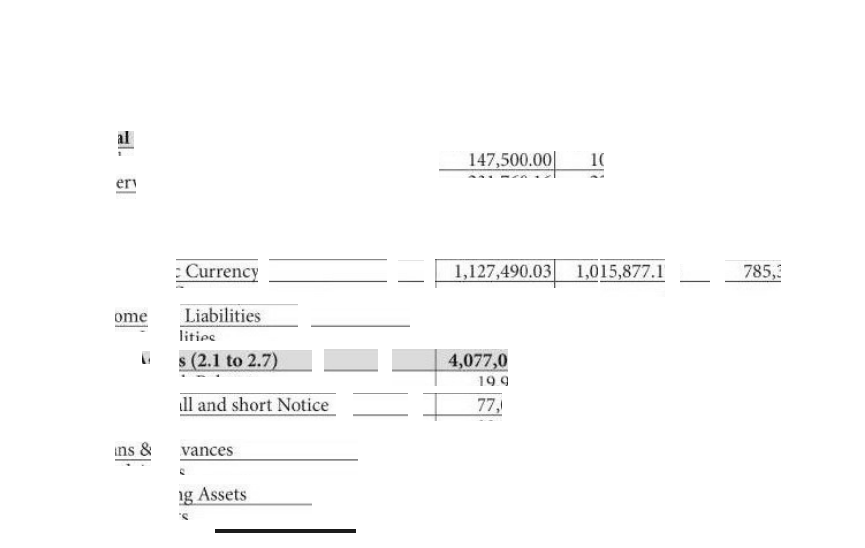

In [161]:
from img2table.tables.processing.tables.implicit_rows import create_word_image

word_img = create_word_image(img=img, ocr_df=ocr_df, min_confidence=50)

PILImage.fromarray(word_img)